In [1]:
import pandas as pd
import os

In [2]:
from nlinec.data.load import get_positive_data, get_all_types
from nlinec.data.preprocessing import get_granularity
from nlinec.utils import get_results_dir

## Setup

In [3]:
# Specify the dataset to predict and a file to save the predictions to
DATASET = 'g_test.json'
SAVE_PREDICTIONS_TO = os.path.join(get_results_dir(), "predictions", "zero-shot", "test_predictions.csv")

# Specify the parameters for the analysis
MODEL = "roberta-large-mnli"

## Load Data & Results

In [4]:
data = get_positive_data(DATASET)
data

8963it [00:00, 69585.46it/s]


,mention_span,full_type,sentence
0,Valley Federal Savings & Loan Association,"[/organization, /organization/company]",Valley Federal Savings & Loan Association sai...
1,Valley Federal,"[/organization, /organization/company]","Terms weren't disclosed, but Valley Federal ha..."
2,Valley Federal,"[/organization, /organization/company]",Valley Federal said Friday that it is conside...
3,"Valley Federal , with assets of $ 3.3 billion ,","[/organization, /organization/company]","Valley Federal , with assets of $ 3.3 billion..."
4,Imperial Corp. of America,"[/organization, /organization/company]",Valley Federal Savings & Loan Association said...
...,...,...,...
8958,"Fridays in general , which tend to be strong d...",[/other],Another study found that the 82 Fridays the 13...
8959,stocks,[/other],"But the date tends to be a plus, not a minus, ..."
8960,the 1962 - 85 period,[/other],"But their study, which spanned the 1962 - 85 p..."
8961,professors,[/person],"Robert Kolb and Ricardo Rodriguez, professors ..."


In [5]:
predictions_df = pd.read_csv(SAVE_PREDICTIONS_TO, index_col=0)
predictions_df

,/other,/other/body_part,/person/title,/person,/person/athlete,/other/art,/other/art/music,/other/event,/other/event/holiday,/other/religion,...,/other/award,/person/coach,/other/language/programming_language,/other/product/computer,/other/event/sports_event,/organization/stock_exchange,/location/structure/hotel,/location/transit/bridge,/location/transit/railway,/other/product/mobile_phone
0,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,0.434638,0.003919,0.050121,...,0.472695,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070
1,0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,0.070559,0.018210,0.005058,...,0.054832,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413
2,0.623685,0.310576,0.318353,0.093013,0.508368,0.242334,0.373239,0.309568,0.015017,0.018152,...,0.372855,0.038756,0.005264,0.005884,0.007539,0.008621,0.006482,0.186038,0.005158,0.007395
3,0.580116,0.321704,0.711406,0.315317,0.737021,0.304867,0.351193,0.759575,0.522606,0.023875,...,0.770497,0.082878,0.004574,0.009910,0.006982,0.004692,0.006081,0.107828,0.003668,0.008083
4,0.558638,0.034668,0.400899,0.609353,0.353965,0.263558,0.291237,0.344860,0.003850,0.031607,...,0.331231,0.022692,0.009449,0.015386,0.009932,0.018702,0.004535,0.099541,0.005629,0.007516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8958,0.924269,0.408539,0.718656,0.486451,0.659437,0.250230,0.378489,0.618250,0.004106,0.004792,...,0.600220,0.545346,0.123162,0.126958,0.004688,0.182676,0.485150,0.526274,0.542790,0.084211
8959,0.517822,0.163099,0.814055,0.345462,0.521436,0.168358,0.038920,0.685981,0.036635,0.012890,...,0.481535,0.074042,0.013095,0.004651,0.003627,0.213741,0.003019,0.219991,0.006267,0.010060
8960,0.499791,0.193294,0.803134,0.075954,0.373144,0.101859,0.061522,0.557806,0.010869,0.012469,...,0.129382,0.176465,0.025468,0.035359,0.021397,0.005953,0.016346,0.369678,0.017249,0.017699
8961,0.577051,0.145499,0.849469,0.647637,0.386386,0.171833,0.095732,0.440784,0.041336,0.028940,...,0.045405,0.089392,0.083740,0.033256,0.017728,0.108233,0.019496,0.153253,0.220906,0.100980


In [6]:
gran_types = []
for i in [1, 2, 3]:
    all_types = get_all_types(granularity=i)
    all_types['granularity'] = all_types['full_type'].apply(lambda x: get_granularity(x))
    gran_types.append(all_types[all_types['granularity'] == i])

In [7]:
gran_types[0]

,full_type,type,granularity
0,/other,other,1
3,/person,person,1
11,/location,location,1
27,/organization,organization,1


## Analysis

In [8]:
# Combine the predictions with the original data based on the index
data_with_predictions = data.join(predictions_df)
data_with_predictions.head()

,mention_span,full_type,sentence,/other,/other/body_part,/person/title,/person,/person/athlete,/other/art,/other/art/music,...,/other/award,/person/coach,/other/language/programming_language,/other/product/computer,/other/event/sports_event,/organization/stock_exchange,/location/structure/hotel,/location/transit/bridge,/location/transit/railway,/other/product/mobile_phone
0,Valley Federal Savings & Loan Association,"[/organization, /organization/company]",Valley Federal Savings & Loan Association sai...,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,...,0.472695,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070
1,Valley Federal,"[/organization, /organization/company]","Terms weren't disclosed, but Valley Federal ha...",0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,...,0.054832,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413
2,Valley Federal,"[/organization, /organization/company]",Valley Federal said Friday that it is conside...,0.623685,0.310576,0.318353,0.093013,0.508368,0.242334,0.373239,...,0.372855,0.038756,0.005264,0.005884,0.007539,0.008621,0.006482,0.186038,0.005158,0.007395
3,"Valley Federal , with assets of $ 3.3 billion ,","[/organization, /organization/company]","Valley Federal , with assets of $ 3.3 billion...",0.580116,0.321704,0.711406,0.315317,0.737021,0.304867,0.351193,...,0.770497,0.082878,0.004574,0.009910,0.006982,0.004692,0.006081,0.107828,0.003668,0.008083
4,Imperial Corp. of America,"[/organization, /organization/company]",Valley Federal Savings & Loan Association said...,0.558638,0.034668,0.400899,0.609353,0.353965,0.263558,0.291237,...,0.331231,0.022692,0.009449,0.015386,0.009932,0.018702,0.004535,0.099541,0.005629,0.007516


In [9]:
# Explode the list of 'full_type' predictions into separate rows
data_with_predictions = data_with_predictions.explode('full_type')

# Get the granularity of the correct type
data_with_predictions['label_granularity'] = data_with_predictions['full_type'].apply(get_granularity)

# Reset the index
data_with_predictions.reset_index(drop=True, inplace=True)
data_with_predictions.head()

,mention_span,full_type,sentence,/other,/other/body_part,/person/title,/person,/person/athlete,/other/art,/other/art/music,...,/person/coach,/other/language/programming_language,/other/product/computer,/other/event/sports_event,/organization/stock_exchange,/location/structure/hotel,/location/transit/bridge,/location/transit/railway,/other/product/mobile_phone,label_granularity
0,Valley Federal Savings & Loan Association,/organization,Valley Federal Savings & Loan Association sai...,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,...,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070,1
1,Valley Federal Savings & Loan Association,/organization/company,Valley Federal Savings & Loan Association sai...,0.544277,0.169135,0.576338,0.124990,0.636014,0.404226,0.465889,...,0.119565,0.009884,0.038332,0.007777,0.035060,0.007525,0.349386,0.013799,0.018070,2
2,Valley Federal,/organization,"Terms weren't disclosed, but Valley Federal ha...",0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,...,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413,1
3,Valley Federal,/organization/company,"Terms weren't disclosed, but Valley Federal ha...",0.099810,0.037933,0.203494,0.219133,0.065956,0.042439,0.069780,...,0.006663,0.005408,0.004754,0.006963,0.008050,0.002942,0.041948,0.002261,0.006413,2
4,Valley Federal,/organization,Valley Federal said Friday that it is conside...,0.623685,0.310576,0.318353,0.093013,0.508368,0.242334,0.373239,...,0.038756,0.005264,0.005884,0.007539,0.008621,0.006482,0.186038,0.005158,0.007395,1


In [10]:
# Compute the predicted type for each granularity
for i in [1, 2, 3]:
    # Get the rows where the correct type has the correct granularity
    granularity_mask = data_with_predictions['label_granularity'] == i

    # Add a new column which stores the predicted type (i.e. the the name of the column with the maximum probability)
    data_with_predictions.loc[granularity_mask, 'predicted_type'] = data_with_predictions.loc[granularity_mask, list(gran_types[i - 1]['full_type'])].idxmax(axis=1)

In [12]:
# Compute the accuracy for each granularity
accuracy = []
for i in [1, 2, 3]:
    # Get the rows where the correct type has the correct granularity
    granularity_mask = data_with_predictions['label_granularity'] == i

    # Compute the accuracy
    accuracy.append((data_with_predictions.loc[granularity_mask, 'predicted_type'] == data_with_predictions.loc[granularity_mask, 'full_type']).mean())

In [13]:
for i in [1, 2, 3]:
    print(f"Accuracy for granularity {i}: {accuracy[i - 1]}")

Accuracy for granularity 1: 0.46007403490216814
Accuracy for granularity 2: 0.34649247372905423
Accuracy for granularity 3: 0.4412470023980815


In [14]:
# Compute a confusion matrix for each granularity
confusion_matrices = []
for i in [1, 2, 3]:
    # Get the rows where the correct type has the correct granularity
    granularity_mask = data_with_predictions['label_granularity'] == i

    # Compute the confusion matrix
    confusion_matrices.append(pd.crosstab(data_with_predictions.loc[granularity_mask, 'full_type'], data_with_predictions.loc[granularity_mask, 'predicted_type'], rownames=['Actual'], colnames=['Predicted'], margins=True))

In [19]:
import matplotlib.pyplot as plt

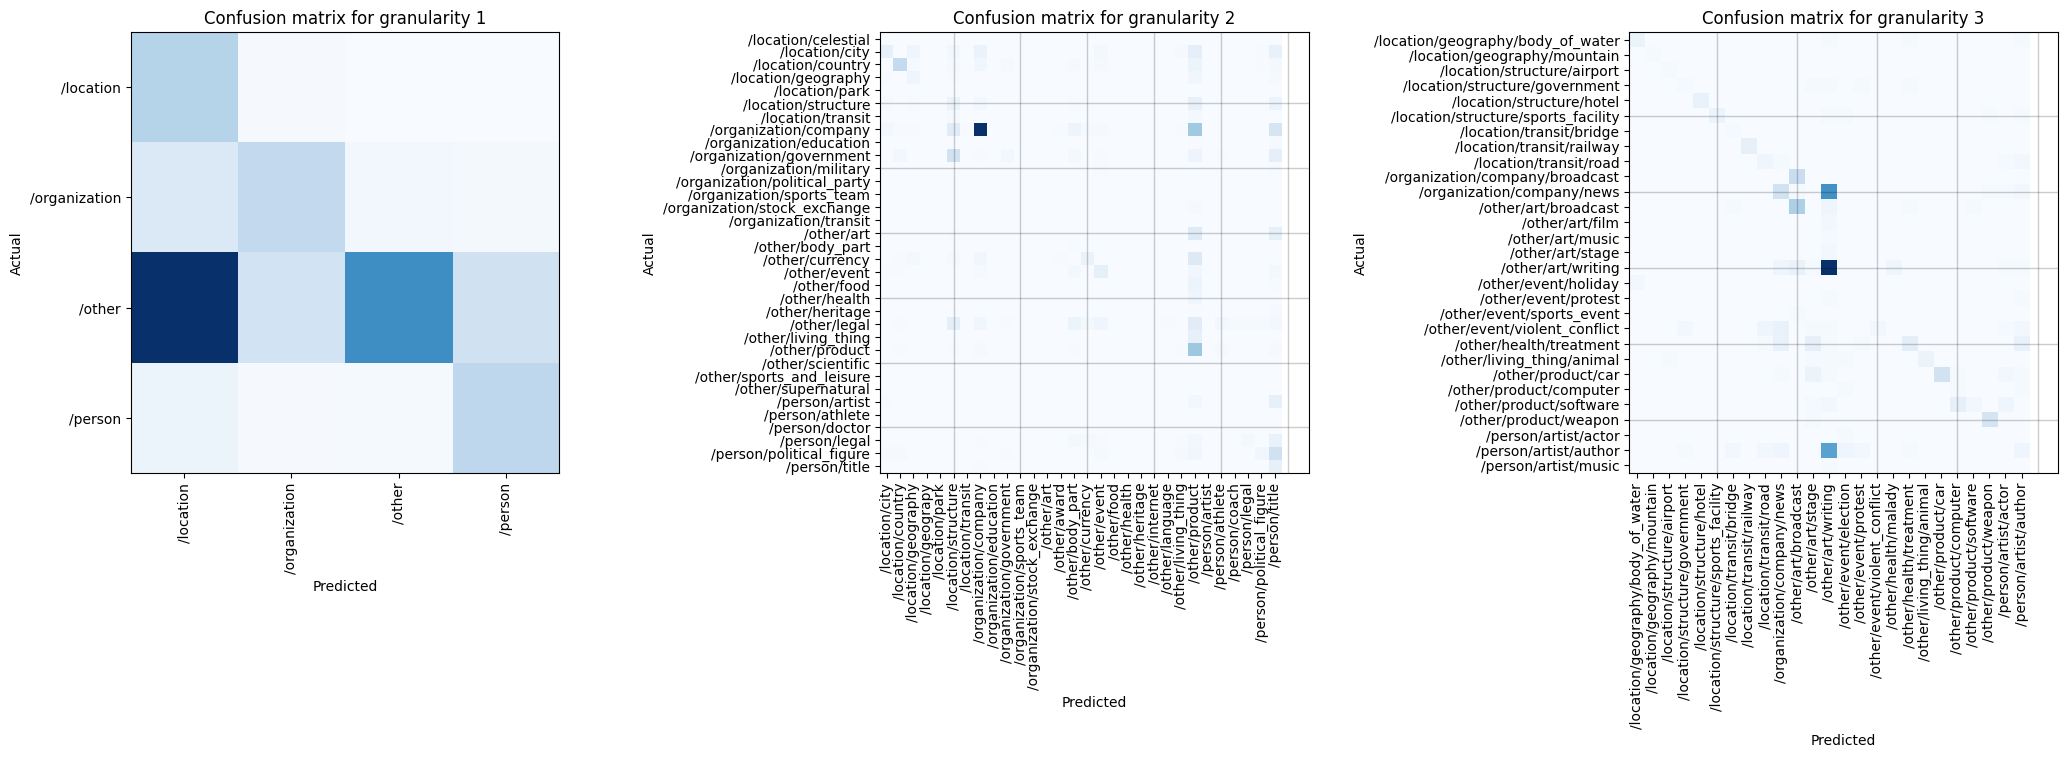

In [45]:
# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.tight_layout(w_pad=20)
for i, ax in zip([1, 2, 3], axes):
    # Show a 2D heatmap of the confusion matrix, but without the 'All' row and column
    ax.imshow(confusion_matrices[i - 1].iloc[:-1, :-1], cmap='Blues', aspect='auto')
    ax.set_xticks(range(len(confusion_matrices[i - 1].columns) - 1))
    ax.set_yticks(range(len(confusion_matrices[i - 1].index) - 1))
    ax.set_xticklabels(confusion_matrices[i - 1].columns[:-1], rotation=90)
    ax.set_yticklabels(confusion_matrices[i - 1].index[:-1])
    ax.set_title(f"Confusion matrix for granularity {i}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    # Show a grid at each 5th step
    for j in range(5, len(confusion_matrices[i - 1].index) - 1, 5):
        ax.axhline(j, color='k', linewidth=1, alpha=0.2)
        ax.axvline(j, color='k', linewidth=1, alpha=0.2)